In [1]:
%reload_ext autoreload
%autoreload 2
#Custom Files
from DataManager import dataManager
from DataManagerUtil import *
import GCN as GCN
import GCNutil as GCNutil
import GDE as GDE
import GDEutil as GDEutil
import GDEsolvers as GDEsolvers
import MLP as MLP
from Full_model import Integrated_Model
from FigurePlotter import FigurePlotter

#Standard Libraries
# Torch
import torch
import torch.autograd
import torch.nn as nn
import torch.nn.functional as F
#Numpy
import numpy as np

torch.manual_seed(0)

In [2]:
#Loading everything from the dataset
filepath = 'datasets\pat_FR_958.mat' #264 253 620 273
variables = load_patient_data(filepath, verbose = False)

In [3]:
dm = dataManager(variables["X_train"],variables["X_test"],variables["y_train"],variables["y_test"],10**(-4))

--------data manager successfully initialized--------


In [4]:
print(dm)
dm.apply_dvariance_filter(28)
dm.mean_pooling_1d(size = 24, stride = 20, padding = 0)
print(dm)

X_train: shape of(2974, 76, 640)
X_test: shape of(3345, 76, 640)
Y_train: shape of(2974, 1)
Y_test: shape of(3345, 1)
A_train: shape of(76, 76)
A_test: shape of(76, 76)
P_avg_train: shape of(76, 76)
P_avg_test: shape of(76, 76)
--------data successfully filtered (dvariance)--------
X_train: shape of(2974, 28, 31)
X_test: shape of(3345, 28, 31)
Y_train: shape of(2974, 1)
Y_test: shape of(3345, 1)
A_train: shape of(28, 28)
A_test: shape of(28, 28)
P_avg_train: shape of(28, 28)
P_avg_test: shape of(28, 28)


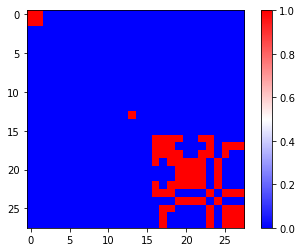

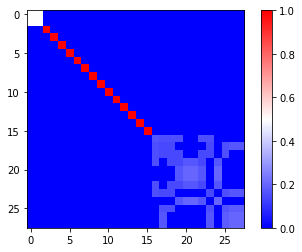

In [7]:
n =1#3000000#1.3*10**-2
dm.re_threshold(n)
show_heat_map(dm.A_train)
show_heat_map(create_DAD(dm.A_train))
#print(create_DAD(dm.A_train))
Araw =  dm.A_train

In [10]:
#model 1
GCNparameters = {
    'body': dm.X_train.shape[2],
    'M': dm.X_train.shape[0],
    'batch_size': 256,
    'n_layers': 2,
    'num_epochs': 5,
    'learning_rate': 1e-3,
    'weight_decay': 5e-3
}
GDEparameters = {
    'body': dm.X_train.shape[2],
    'solver': GDEsolvers.explicit_RK,
    'solver_params': {
    "t0": 0,
    "t1": 1,
    "N": 5,
    "b_tableau": GDEsolvers.RK4
     },
    'hidden_layers': 1,
    'M': dm.X_train.shape[0],
    'batch_size': 128,
    'num_epochs': 5,
    'learning_rate': 1e-3,
    'weight_decay': 5e-3
}
MLPparametersGCN = {
    'n_layers':2,
    'layer_size_factor':[1,50], 
    'dropout':[0.3, 0.15],
    'batch_size': 128,
    'num_epochs': 900,
    'learning_rate': 6e-4,
    'weight_decay': 5e-3,
    'betas': (0.9, 0.999), 
    'eps': 1e-08
}
MLPparametersGDE = {
    'n_layers':2,
    'layer_size_factor':[1, 50], 
    'dropout':[0.3, 0.15],
    'batch_size': 128,
    'num_epochs': 900,
    'learning_rate': 6e-4,
    'weight_decay': 5e-3,
    'betas': (0.9, 0.999), 
    'eps': 1e-08
}

 50%|█████     | 6/12 [00:00<00:00, 56.75it/s]

----------Training GCN-----------
device set to cpu


 50%|█████     | 6/12 [00:00<00:00, 56.75it/s]

Epoch: 1   Batch: 12 of size 256   Train loss: 287.55511474609375   Valid loss: 287.0367431640625
Epoch: 2   Batch: 9 of size 256   Train loss: 281.9380187988281   Valid loss: 282.117431640625755

 50%|█████     | 6/12 [00:00<00:00, 58.98it/s]

Epoch: 2   Batch: 12 of size 256   Train loss: 281.4009704589844   Valid loss: 281.3755187988281
Epoch: 3   Batch: 8 of size 256   Train loss: 279.0704345703125   Valid loss: 280.54791259765625

 50%|█████     | 6/12 [00:00<00:00, 56.22it/s]

Epoch: 3   Batch: 12 of size 256   Train loss: 279.09588623046875   Valid loss: 280.2956542968755
Epoch: 4   Batch: 6 of size 256   Train loss: 278.56365966796875   Valid loss: 280.2597961425781

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 4   Batch: 12 of size 256   Train loss: 278.5928649902344   Valid loss: 280.01119995117195
Epoch: 5   Batch: 4 of size 256   Train loss: 278.4490051269531   Valid loss: 280.0865173339844

  0%|          | 0/24 [00:00<?, ?it/s]

Epoch: 5   Batch: 12 of size 256   Train loss: 278.07562255859375   Valid loss: 278.90313720703125
----------Training Ends-----------
----------Training GDE-----------
device set to cpu


  8%|▊         | 2/24 [00:00<00:03,  6.72it/s]

 17%|█▋        | 4/24 [00:00<00:02,  7.07it/s]

 25%|██▌       | 6/24 [00:00<00:02,  6.97it/s]

 33%|███▎      | 8/24 [00:01<00:02,  7.09it/s]

 42%|████▏     | 10/24 [00:01<00:01,  7.31it/s]

 50%|█████     | 12/24 [00:01<00:01,  7.41it/s]

 58%|█████▊    | 14/24 [00:01<00:01,  7.22it/s]

 67%|██████▋   | 16/24 [00:02<00:01,  7.21it/s]

 75%|███████▌  | 18/24 [00:02<00:00,  7.47it/s]

 83%|████████▎ | 20/24 [00:02<00:00,  7.48it/s]

 92%|█████████▏| 22/24 [00:03<00:00,  7.37it/s]

  4%|▍         | 1/24 [00:00<00:03,  7.34it/s]

Epoch: 1   Batch: 24 of size 128   Train loss: 280.31658935546875   Valid loss: 280.2771911621094


 12%|█▎        | 3/24 [00:00<00:02,  7.50it/s]

 21%|██        | 5/24 [00:00<00:02,  7.28it/s]

 29%|██▉       | 7/24 [00:00<00:02,  7.41it/s]

 38%|███▊      | 9/24 [00:01<00:02,  7.43it/s]

 46%|████▌     | 11/24 [00:01<00:01,  7.55it/s]

 54%|█████▍    | 13/24 [00:01<00:01,  7.50it/s]

 62%|██████▎   | 15/24 [00:02<00:01,  7.51it/s]

 71%|███████   | 17/24 [00:02<00:00,  7.62it/s]

 79%|███████▉  | 19/24 [00:02<00:00,  7.51it/s]

 88%|████████▊ | 21/24 [00:02<00:00,  7.23it/s]

 96%|█████████▌| 23/24 [00:03<00:00,  7.34it/s]

Epoch: 2   Batch: 23 of size 128   Train loss: 277.644287109375   Valid loss: 278.095306396484494

  4%|▍         | 1/24 [00:00<00:02,  8.02it/s]

 2   Batch: 24 of size 128   Train loss: 277.0663757324219   Valid loss: 278.818115234375


 12%|█▎        | 3/24 [00:00<00:02,  7.82it/s]

 21%|██        | 5/24 [00:00<00:02,  7.54it/s]

 29%|██▉       | 7/24 [00:00<00:02,  7.60it/s]

 38%|███▊      | 9/24 [00:01<00:01,  7.72it/s]

 46%|████▌     | 11/24 [00:01<00:01,  7.64it/s]

 54%|█████▍    | 13/24 [00:01<00:01,  7.52it/s]

 62%|██████▎   | 15/24 [00:01<00:01,  7.54it/s]

 71%|███████   | 17/24 [00:02<00:00,  7.65it/s]

 79%|███████▉  | 19/24 [00:02<00:00,  7.58it/s]

 88%|████████▊ | 21/24 [00:02<00:00,  7.49it/s]

 96%|█████████▌| 23/24 [00:03<00:00,  7.56it/s]

Epoch: 3   Batch: 23 of size 128   Train loss: 276.5645751953125   Valid loss: 276.33282470703125

  4%|▍         | 1/24 [00:00<00:02,  7.77it/s]

 3   Batch: 24 of size 128   Train loss: 275.28173828125   Valid loss: 276.13323974609375


 12%|█▎        | 3/24 [00:00<00:02,  7.72it/s]

 21%|██        | 5/24 [00:00<00:02,  7.64it/s]

 29%|██▉       | 7/24 [00:00<00:02,  7.51it/s]

 38%|███▊      | 9/24 [00:01<00:01,  7.50it/s]

 46%|████▌     | 11/24 [00:01<00:01,  7.54it/s]

 54%|█████▍    | 13/24 [00:01<00:01,  7.51it/s]

 62%|██████▎   | 15/24 [00:01<00:01,  7.53it/s]

 71%|███████   | 17/24 [00:02<00:00,  7.50it/s]

 79%|███████▉  | 19/24 [00:02<00:00,  7.39it/s]

 88%|████████▊ | 21/24 [00:02<00:00,  7.43it/s]

100%|██████████| 24/24 [00:03<00:00,  7.70it/s]


  4%|▍         | 1/24 [00:00<00:03,  7.43it/s]

 12%|█▎        | 3/24 [00:00<00:02,  7.34it/s]

 21%|██        | 5/24 [00:00<00:02,  7.48it/s]

 29%|██▉       | 7/24 [00:00<00:02,  7.58it/s]

 38%|███▊      | 9/24 [00:01<00:01,  7.54it/s]

 46%|████▌     | 11/24 [00:01<00:01,  6.83it/s]

 54%|█████▍    | 13/24 [00:01<00:01,  7.08it/s]

 62%|██████▎   | 15/24 [00:02<00:01,  7.23it/s]

 71%|███████   | 17/24 [00:02<00:00,  7.20it/s]

 79%|███████▉  | 19/24 [00:02<00:00,  7.31it/s]

 88%|████████▊ | 21/24 [00:02<00:00,  7.45it/s]

100%|██████████| 24/24 [00:03<00:00,  7.52it/s]

Epoch: 5   Batch: 24 of size 128   Train loss: 271.4647521972656   Valid loss: 271.26284790039065
----------Training Ends-----------


Average Ictal and Non-Ictal Simularity Matrix for GCN
Average ictal


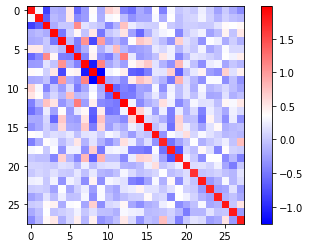

Average Non-Ictal


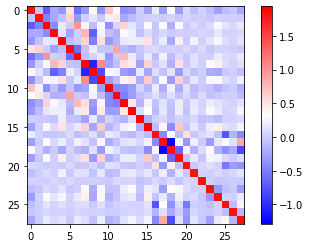

Average Ictal and Non-Ictal Simularity Matrix for GDE
Average ictal


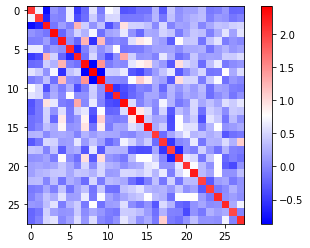

Average Non-Ictal


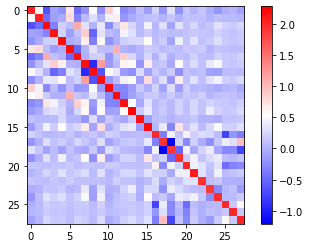

Sample Ictal and Non-Ictal Simularity Matrix for GCN
sample ictal


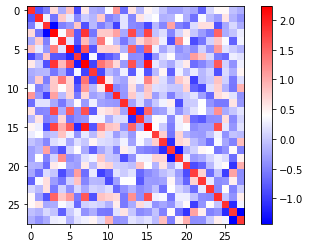

sample Non-Ictal


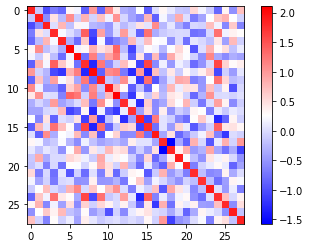

Sample Ictal and Non-Ictal Simularity Matrix for GDE
sample ictal


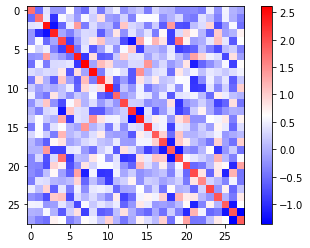

sample Non-Ictal


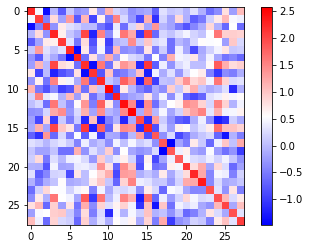

----------Training MLP-----------
0.656 ----------saved-----------
0.696 ----------saved-----------
0.747 ----------saved-----------
0.787 ----------saved-----------
0.813 ----------saved-----------
0.828 ----------saved-----------
0.831 ----------saved-----------
0.832 ----------saved-----------
0.833 ----------saved-----------
0.833 ----------saved-----------
0.835 ----------saved-----------
----------------------------------
0.494 ----------saved-----------
0.551 ----------saved-----------
0.676 ----------saved-----------
0.743 ----------saved-----------
0.768 ----------saved-----------
0.781 ----------saved-----------
0.795 ----------saved-----------
0.801 ----------saved-----------
0.802 ----------saved-----------
0.808 ----------saved-----------
0.812 ----------saved-----------
0.813 ----------saved-----------
0.814 ----------saved-----------
0.816 ----------saved-----------
----------Training Ends-----------


In [11]:
M1 = Integrated_Model(GCNparameters, GDEparameters, MLPparametersGCN, MLPparametersGDE, dm, create_DAD(Araw))

In [16]:
FP = FigurePlotter('P442', 'Figures/Figure Patient 2')

<Figure size 432x288 with 0 Axes>

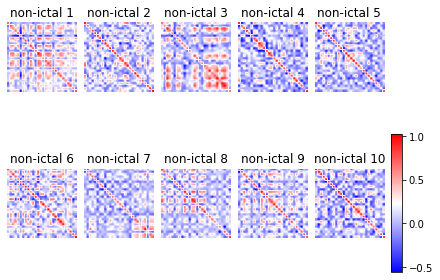

<Figure size 432x288 with 0 Axes>

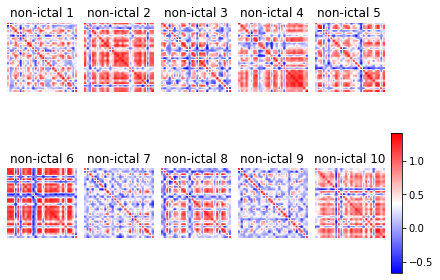

In [17]:
FP.sequential_plot(M1, dm, Araw, 'model_1', i=15)

<Figure size 432x288 with 0 Axes>

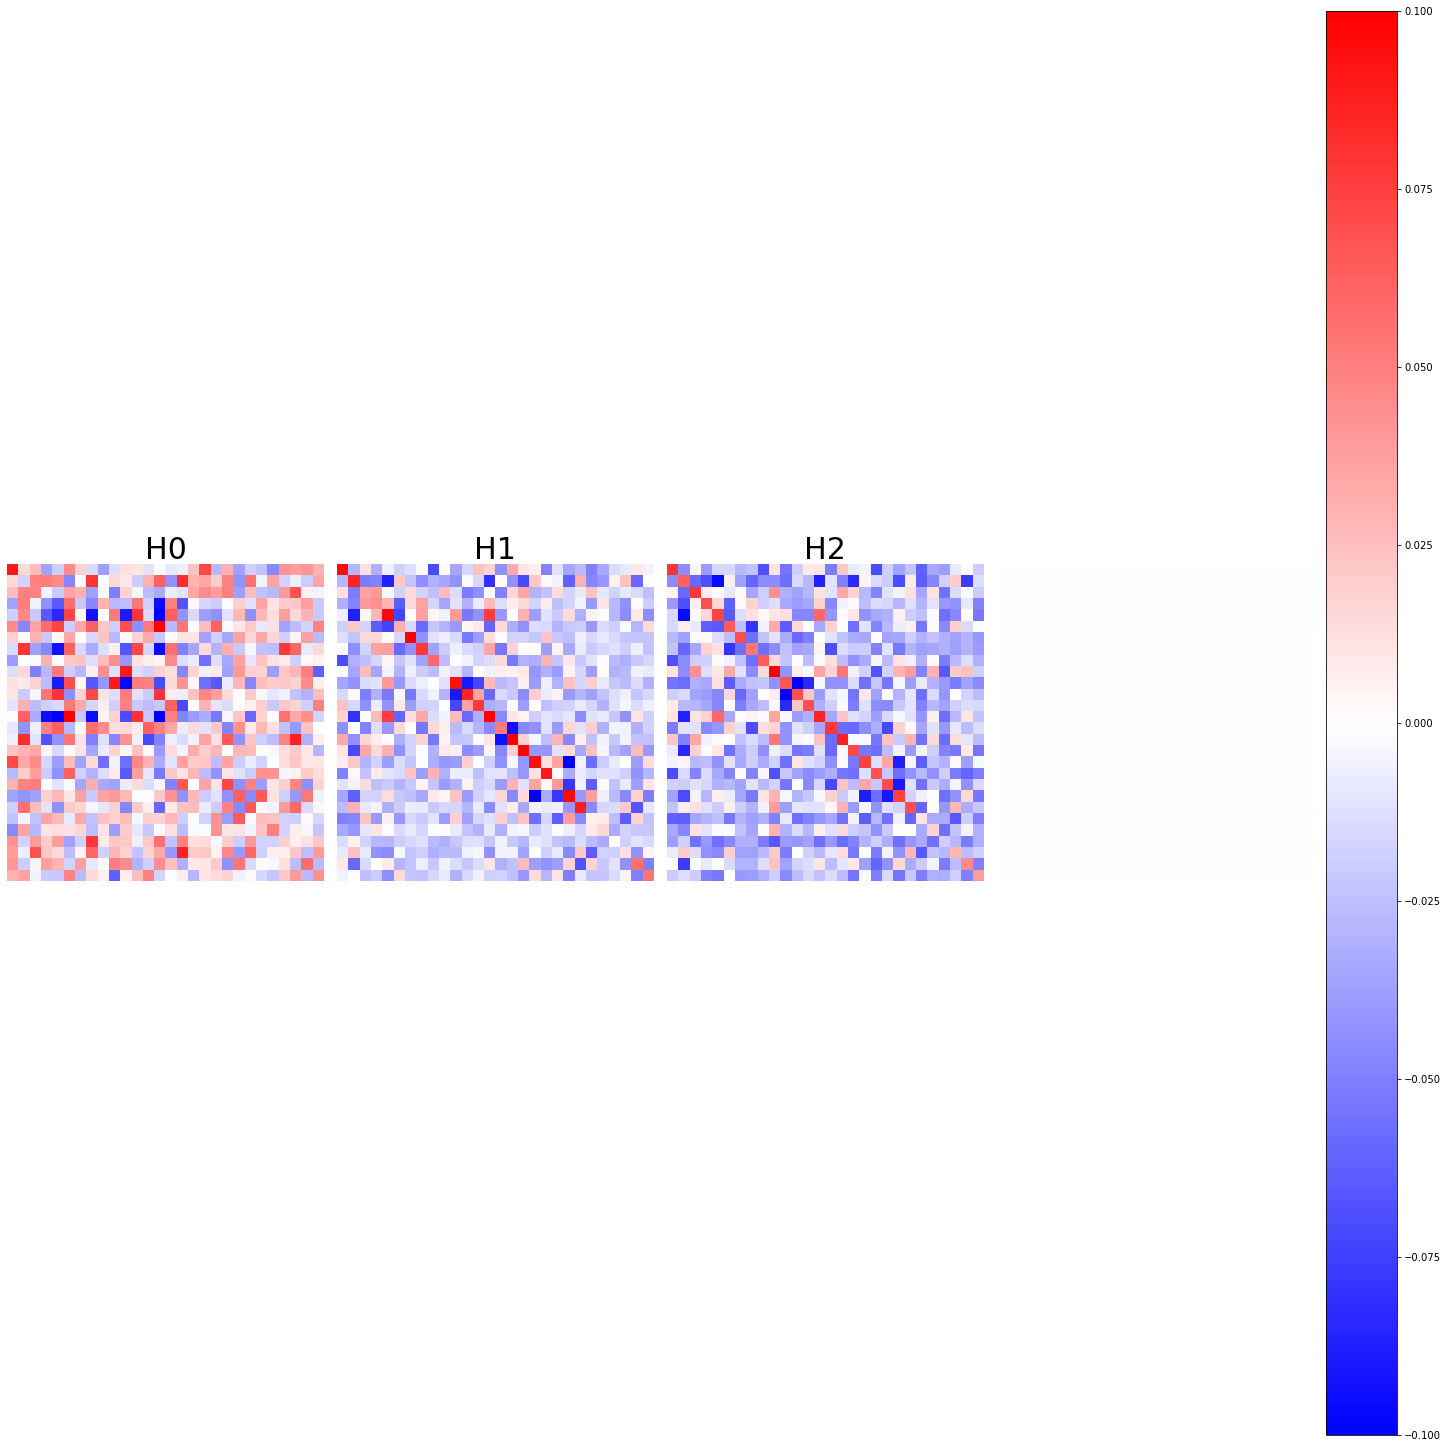

<Figure size 432x288 with 0 Axes>

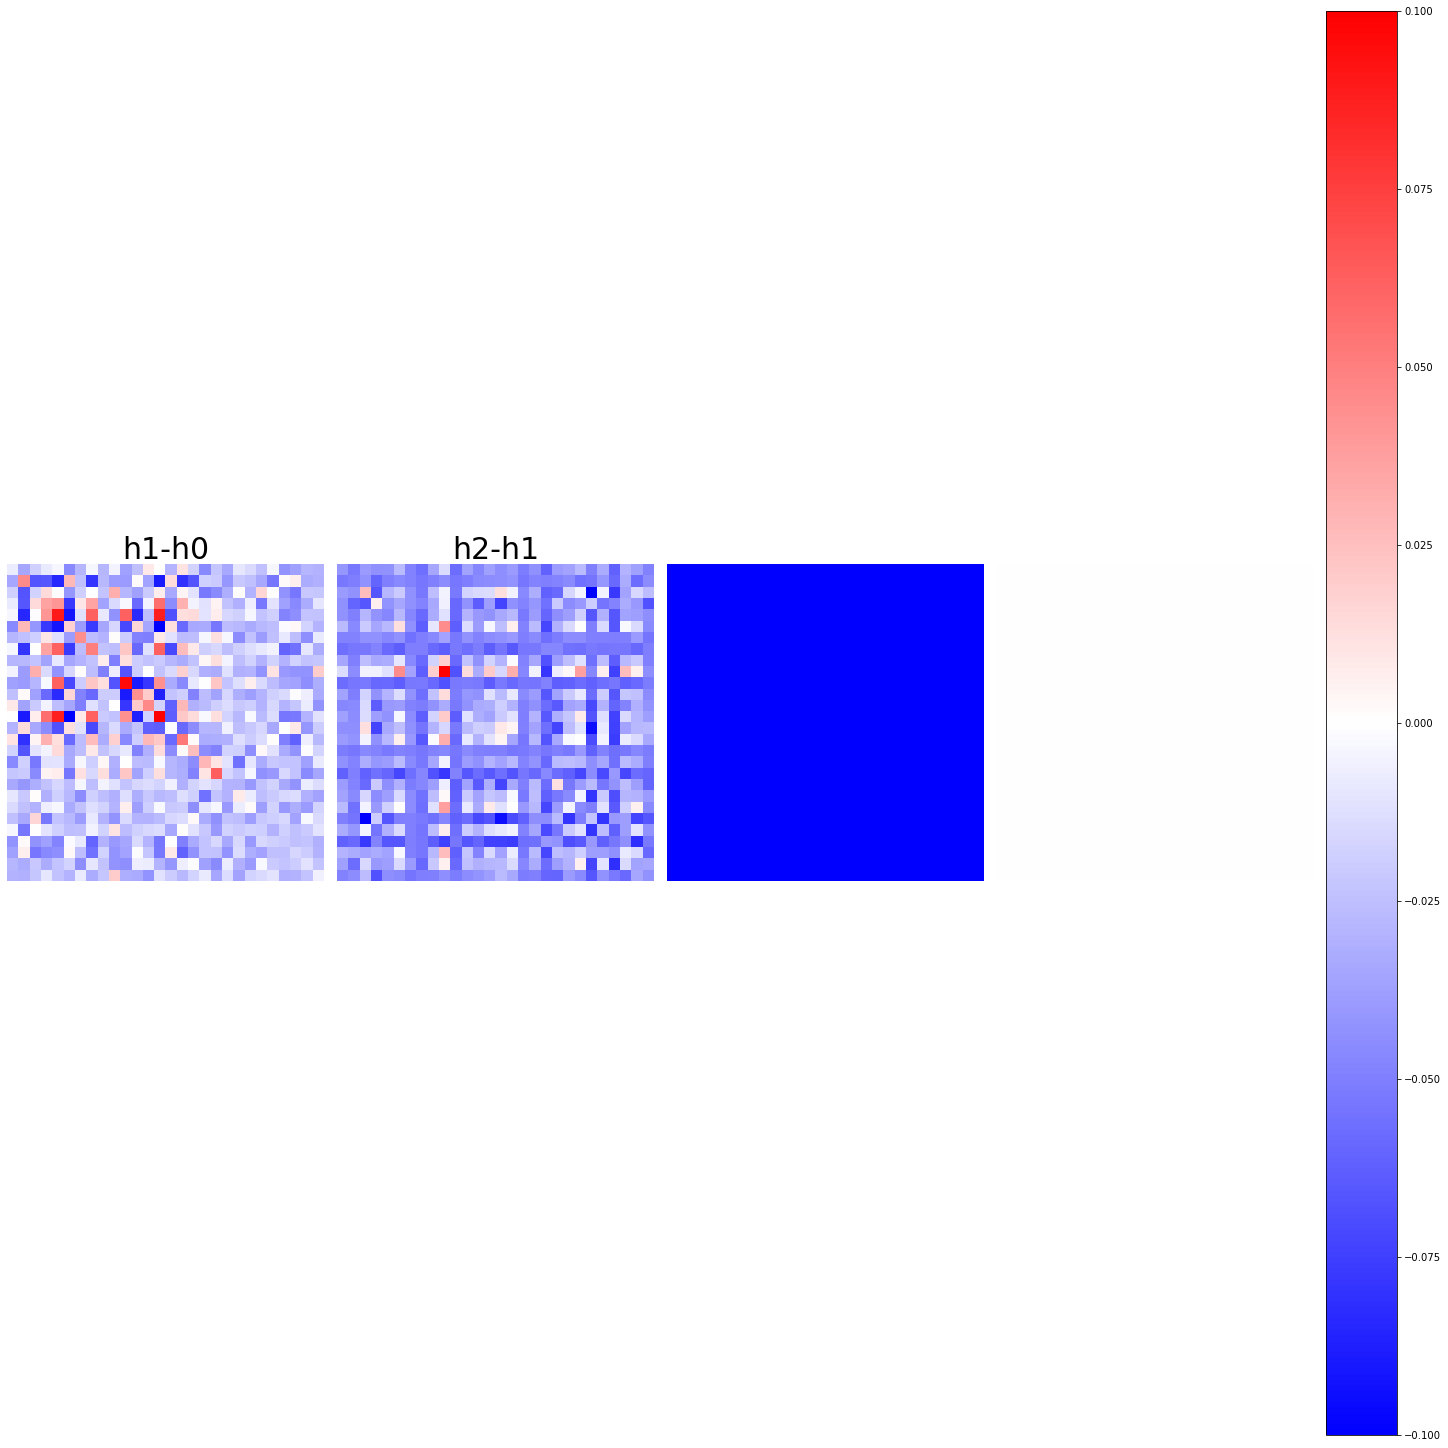

<Figure size 432x288 with 0 Axes>

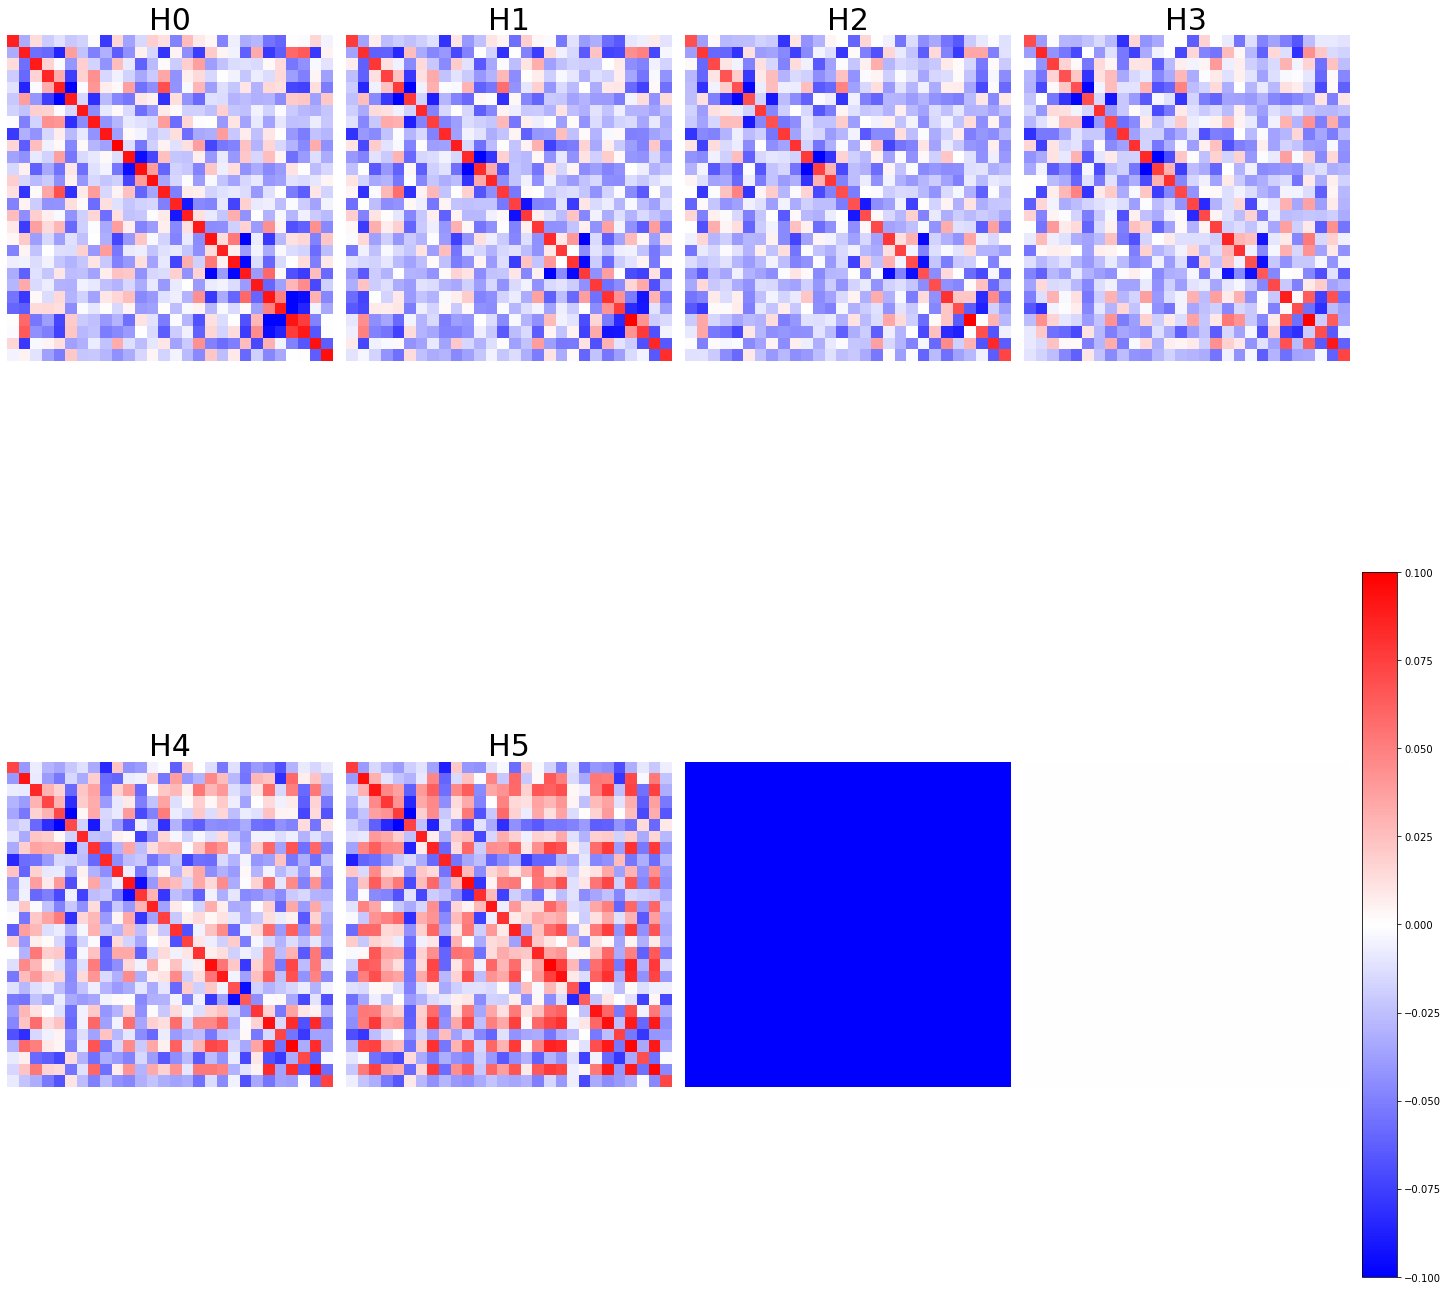

<Figure size 432x288 with 0 Axes>

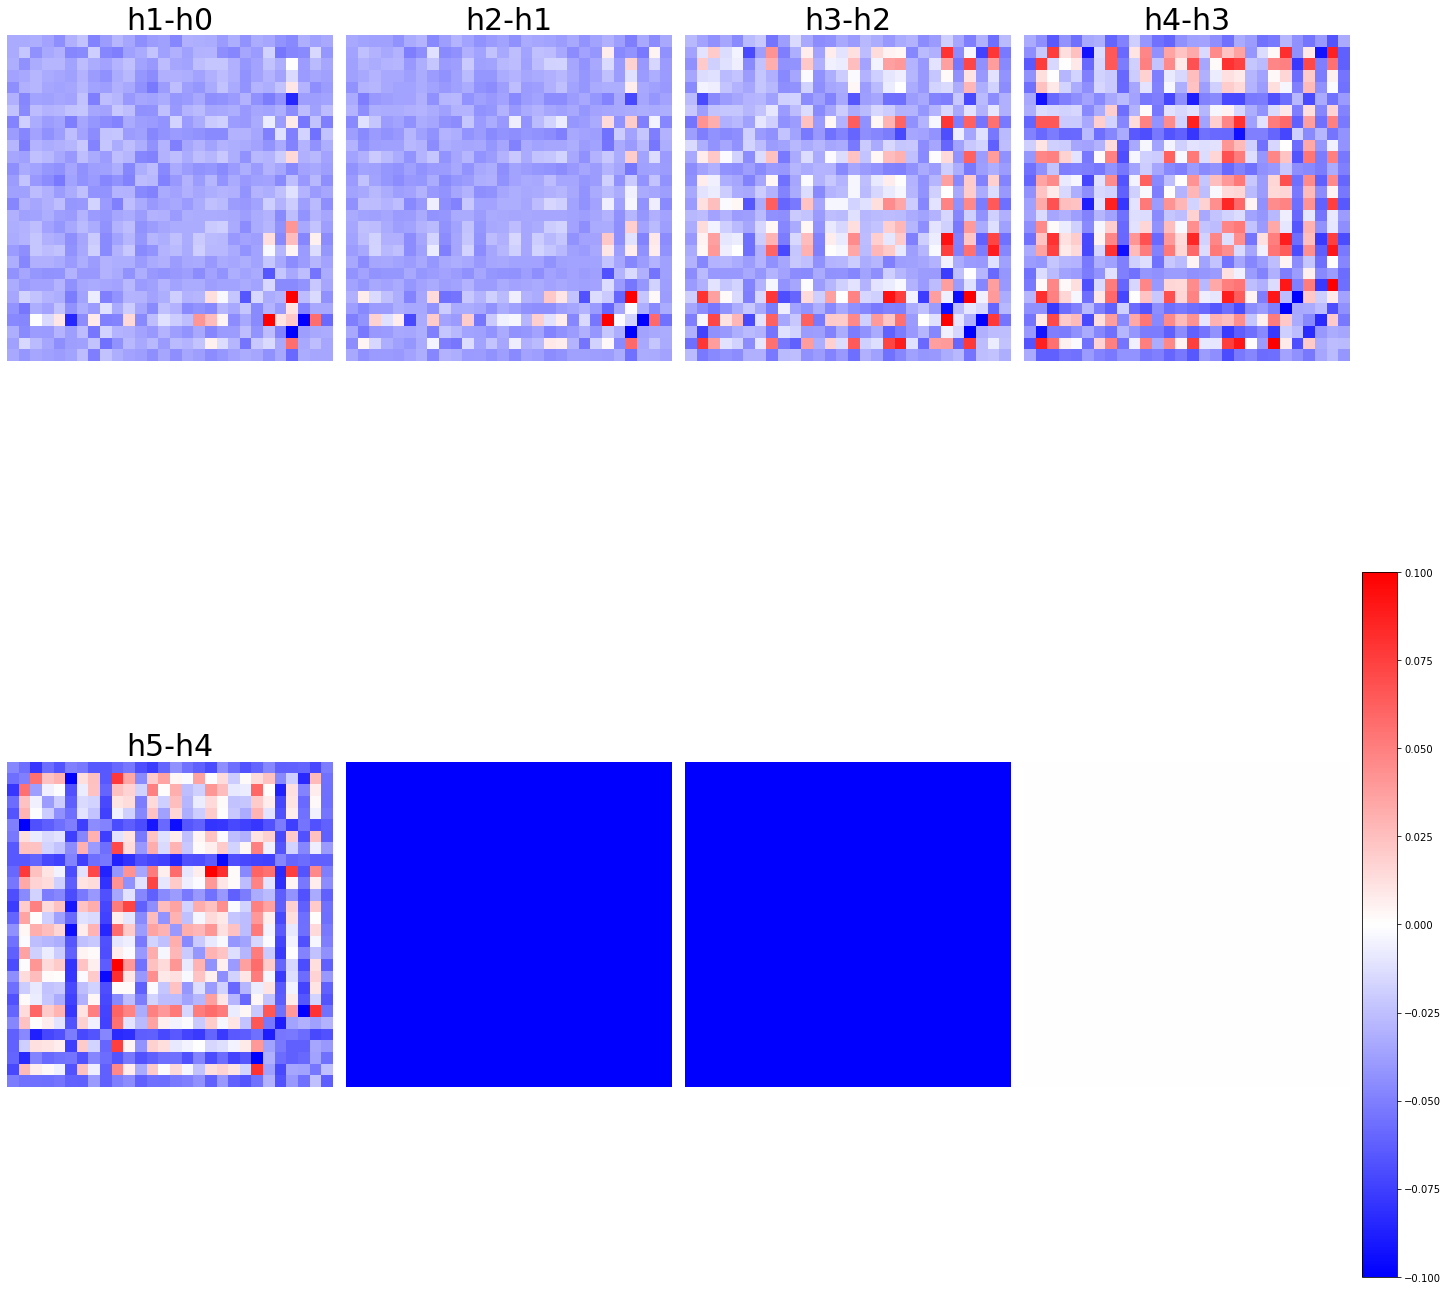

In [18]:
FP.sim_progression(M1, dm, Araw, 'model_1')

In [24]:
#model 2
GCNparameters = {
    'body': dm.X_train.shape[2],
    'M': dm.X_train.shape[0],
    'batch_size': 512,
    'n_layers': 1,
    'num_epochs': 5,
    'learning_rate': 1e-3,
    'weight_decay': 5e-3
}
GDEparameters = {
    'body': dm.X_train.shape[2],
    'solver': GDEsolvers.explicit_RK,
    'solver_params': {
    "t0": 0,
    "t1": 1,
    "N": 5,
    "b_tableau": GDEsolvers.EF
     },
    'hidden_layers': 1,
    'M': dm.X_train.shape[0],
    'batch_size': 512,
    'num_epochs': 5,
    'learning_rate': 1e-3,
    'weight_decay': 5e-3
}
MLPparametersGCN = {
    'n_layers':2,
    'layer_size_factor':[1,50], 
    'dropout':[0.3, 0.15],
    'batch_size': 128,
    'num_epochs': 900,
    'learning_rate': 6e-4,
    'weight_decay': 5e-3,
    'betas': (0.9, 0.999), 
    'eps': 1e-08
}
MLPparametersGDE = {
    'n_layers':2,
    'layer_size_factor':[1, 50], 
    'dropout':[0.3, 0.15],
    'batch_size': 128,
    'num_epochs': 900,
    'learning_rate': 6e-4,
    'weight_decay': 5e-3,
    'betas': (0.9, 0.999), 
    'eps': 1e-08
}

 19%|█▉        | 4/21 [00:00<00:00, 31.33it/s]

----------Training GCN-----------
device set to cpu


 52%|█████▏    | 11/21 [00:00<00:00, 30.60it/s]

 81%|████████  | 17/21 [00:00<00:00, 29.78it/s]

Epoch: 1   Batch: 17 of size 512   Train loss: 647.5128784179688   Valid loss: 647.6854858398438

  0%|          | 0/21 [00:00<?, ?it/s]

Epoch: 1   Batch: 21 of size 512   Train loss: 647.8729858398438   Valid loss: 647.1752319335938
Epoch: 2   Batch: 2 of size 512   Train loss: 647.395751953125   Valid loss: 647.59832763671885

 33%|███▎      | 7/21 [00:00<00:00, 29.00it/s]

Epoch: 2   Batch: 8 of size 512   Train loss: 647.2069702148438   Valid loss: 647.5050048828125

 48%|████▊     | 10/21 [00:00<00:00, 28.40it/s]

Epoch: 2   Batch: 13 of size 512   Train loss: 647.10107421875   Valid loss: 647.208068847656262

 86%|████████▌ | 18/21 [00:00<00:00, 29.40it/s]

Epoch: 2   Batch: 19 of size 512   Train loss: 647.4196166992188   Valid loss: 647.1484375382812

 19%|█▉        | 4/21 [00:00<00:00, 32.61it/s]

Epoch: 2   Batch: 21 of size 512   Train loss: 647.0247192382812   Valid loss: 647.4456176757812


 57%|█████▋    | 12/21 [00:00<00:00, 32.02it/s]

 71%|███████▏  | 15/21 [00:00<00:00, 30.74it/s]

Epoch: 3   Batch: 18 of size 512   Train loss: 646.42529296875   Valid loss: 646.581115722656225

 19%|█▉        | 4/21 [00:00<00:00, 31.21it/s]

Epoch: 3   Batch: 21 of size 512   Train loss: 646.3406372070312   Valid loss: 646.471435546875
Epoch: 4   Batch: 4 of size 512   Train loss: 646.5772705078125   Valid loss: 646.4566650390625

 33%|███▎      | 7/21 [00:00<00:00, 30.67it/s]

Epoch: 4   Batch: 10 of size 512   Train loss: 646.3538818359375   Valid loss: 646.3443603515625

 67%|██████▋   | 14/21 [00:00<00:00, 30.63it/s]

Epoch: 4   Batch: 16 of size 512   Train loss: 646.418701171875   Valid loss: 646.64050292968758

  0%|          | 0/21 [00:00<?, ?it/s]

Epoch: 4   Batch: 21 of size 512   Train loss: 646.5486450195312   Valid loss: 646.6652221679688
Epoch: 5   Batch: 1 of size 512   Train loss: 646.6146850585938   Valid loss: 646.750732421875

 19%|█▉        | 4/21 [00:00<00:00, 31.33it/s]

Epoch: 5   Batch: 7 of size 512   Train loss: 646.4988403320312   Valid loss: 646.1884155273438

 57%|█████▋    | 12/21 [00:00<00:00, 31.30it/s]

Epoch: 5   Batch: 13 of size 512   Train loss: 645.9097900390625   Valid loss: 645.9242553710938

 76%|███████▌  | 16/21 [00:00<00:00, 31.24it/s]

Epoch: 5   Batch: 19 of size 512   Train loss: 645.8763427734375   Valid loss: 645.8552246093758

  5%|▍         | 1/21 [00:00<00:02,  7.90it/s]

Epoch: 5   Batch: 21 of size 512   Train loss: 645.8396606445312   Valid loss: 645.3724365234375
----------Training Ends-----------
----------Training GDE-----------
device set to cpu


 14%|█▍        | 3/21 [00:00<00:02,  7.83it/s]

 24%|██▍       | 5/21 [00:00<00:02,  7.60it/s]

 33%|███▎      | 7/21 [00:00<00:01,  7.41it/s]

 43%|████▎     | 9/21 [00:01<00:01,  7.65it/s]

 52%|█████▏    | 11/21 [00:01<00:01,  7.57it/s]

 62%|██████▏   | 13/21 [00:01<00:01,  7.62it/s]

 71%|███████▏  | 15/21 [00:01<00:00,  7.45it/s]

 81%|████████  | 17/21 [00:02<00:00,  7.53it/s]

 90%|█████████ | 19/21 [00:02<00:00,  7.50it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Epoch: 1   Batch: 21 of size 512   Train loss: 646.82958984375   Valid loss: 647.9635620117188


 10%|▉         | 2/21 [00:00<00:02,  7.85it/s]

 19%|█▉        | 4/21 [00:00<00:02,  7.84it/s]

 29%|██▊       | 6/21 [00:00<00:01,  7.74it/s]

 38%|███▊      | 8/21 [00:01<00:01,  7.91it/s]

 48%|████▊     | 10/21 [00:01<00:01,  7.80it/s]

 57%|█████▋    | 12/21 [00:01<00:01,  7.62it/s]

 67%|██████▋   | 14/21 [00:01<00:00,  7.59it/s]

 76%|███████▌  | 16/21 [00:02<00:00,  7.73it/s]

 86%|████████▌ | 18/21 [00:02<00:00,  7.60it/s]

 95%|█████████▌| 20/21 [00:02<00:00,  7.40it/s]

  5%|▍         | 1/21 [00:00<00:02,  7.71it/s]

Epoch: 2   Batch: 21 of size 512   Train loss: 645.750732421875   Valid loss: 645.5867919921875


 14%|█▍        | 3/21 [00:00<00:02,  7.40it/s]

 24%|██▍       | 5/21 [00:00<00:02,  7.50it/s]

 33%|███▎      | 7/21 [00:00<00:01,  7.56it/s]

 43%|████▎     | 9/21 [00:01<00:01,  7.61it/s]

 52%|█████▏    | 11/21 [00:01<00:01,  7.62it/s]

 62%|██████▏   | 13/21 [00:01<00:01,  7.68it/s]

 71%|███████▏  | 15/21 [00:01<00:00,  7.64it/s]

 81%|████████  | 17/21 [00:02<00:00,  7.63it/s]

 90%|█████████ | 19/21 [00:02<00:00,  7.54it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Epoch: 3   Batch: 21 of size 512   Train loss: 643.9247436523438   Valid loss: 643.8762817382812


 10%|▉         | 2/21 [00:00<00:02,  7.85it/s]

 19%|█▉        | 4/21 [00:00<00:02,  7.52it/s]

 29%|██▊       | 6/21 [00:00<00:02,  7.47it/s]

 38%|███▊      | 8/21 [00:01<00:01,  7.60it/s]

 48%|████▊     | 10/21 [00:01<00:01,  7.58it/s]

 57%|█████▋    | 12/21 [00:01<00:01,  7.47it/s]

 67%|██████▋   | 14/21 [00:01<00:00,  7.62it/s]

 76%|███████▌  | 16/21 [00:02<00:00,  7.22it/s]

 86%|████████▌ | 18/21 [00:02<00:00,  7.31it/s]

 95%|█████████▌| 20/21 [00:02<00:00,  7.60it/s]

  5%|▍         | 1/21 [00:00<00:02,  7.62it/s]

Epoch: 4   Batch: 21 of size 512   Train loss: 642.65283203125   Valid loss: 644.4610595703125


 14%|█▍        | 3/21 [00:00<00:02,  7.54it/s]

 24%|██▍       | 5/21 [00:00<00:02,  7.57it/s]

 33%|███▎      | 7/21 [00:00<00:01,  7.52it/s]

 43%|████▎     | 9/21 [00:01<00:01,  7.71it/s]

 52%|█████▏    | 11/21 [00:01<00:01,  7.59it/s]

 62%|██████▏   | 13/21 [00:01<00:01,  7.58it/s]

 71%|███████▏  | 15/21 [00:01<00:00,  7.24it/s]

 81%|████████  | 17/21 [00:02<00:00,  7.20it/s]

 90%|█████████ | 19/21 [00:02<00:00,  7.21it/s]

100%|██████████| 21/21 [00:02<00:00,  7.56it/s]

Epoch: 5   Batch: 21 of size 512   Train loss: 640.506103515625   Valid loss: 642.8161010742188
----------Training Ends-----------


Average Ictal and Non-Ictal Simularity Matrix for GCN
Average ictal


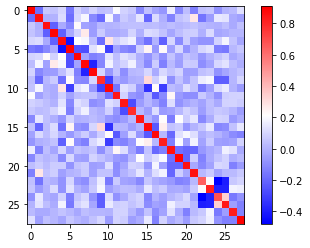

Average Non-Ictal


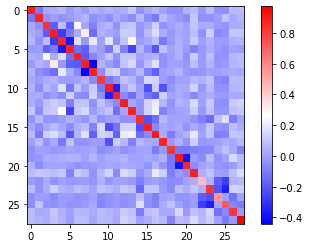

Average Ictal and Non-Ictal Simularity Matrix for GDE
Average ictal


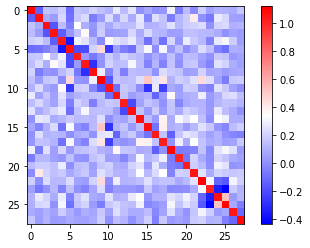

Average Non-Ictal


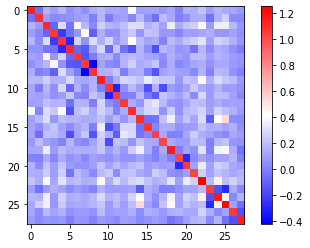

Sample Ictal and Non-Ictal Simularity Matrix for GCN
sample ictal


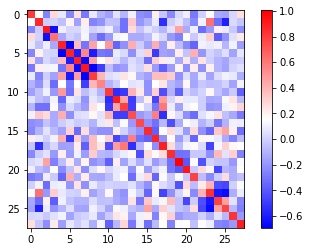

sample Non-Ictal


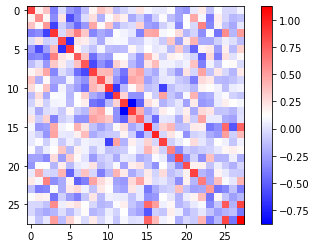

Sample Ictal and Non-Ictal Simularity Matrix for GDE
sample ictal


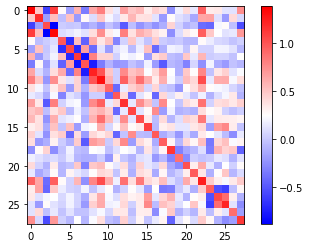

sample Non-Ictal


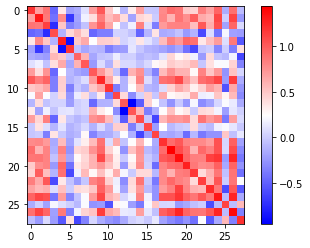

----------Training MLP-----------
0.813 ----------saved-----------
0.819 ----------saved-----------
0.823 ----------saved-----------
0.824 ----------saved-----------
0.827 ----------saved-----------
0.831 ----------saved-----------
0.832 ----------saved-----------
0.836 ----------saved-----------
----------------------------------
0.741 ----------saved-----------
0.825 ----------saved-----------
0.844 ----------saved-----------
0.846 ----------saved-----------
0.846 ----------saved-----------
----------Training Ends-----------


In [25]:
M2 = Integrated_Model(GCNparameters, GDEparameters, MLPparametersGCN, MLPparametersGDE, dm, create_DAD(Araw))

<Figure size 432x288 with 0 Axes>

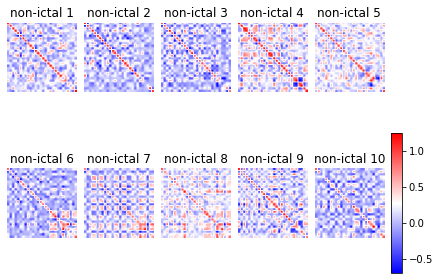

<Figure size 432x288 with 0 Axes>

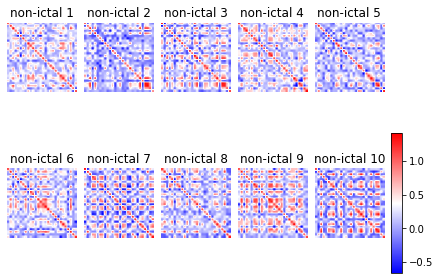

In [26]:
FP.sequential_plot(M2, dm, Araw, 'model_2', i=5)

<Figure size 432x288 with 0 Axes>

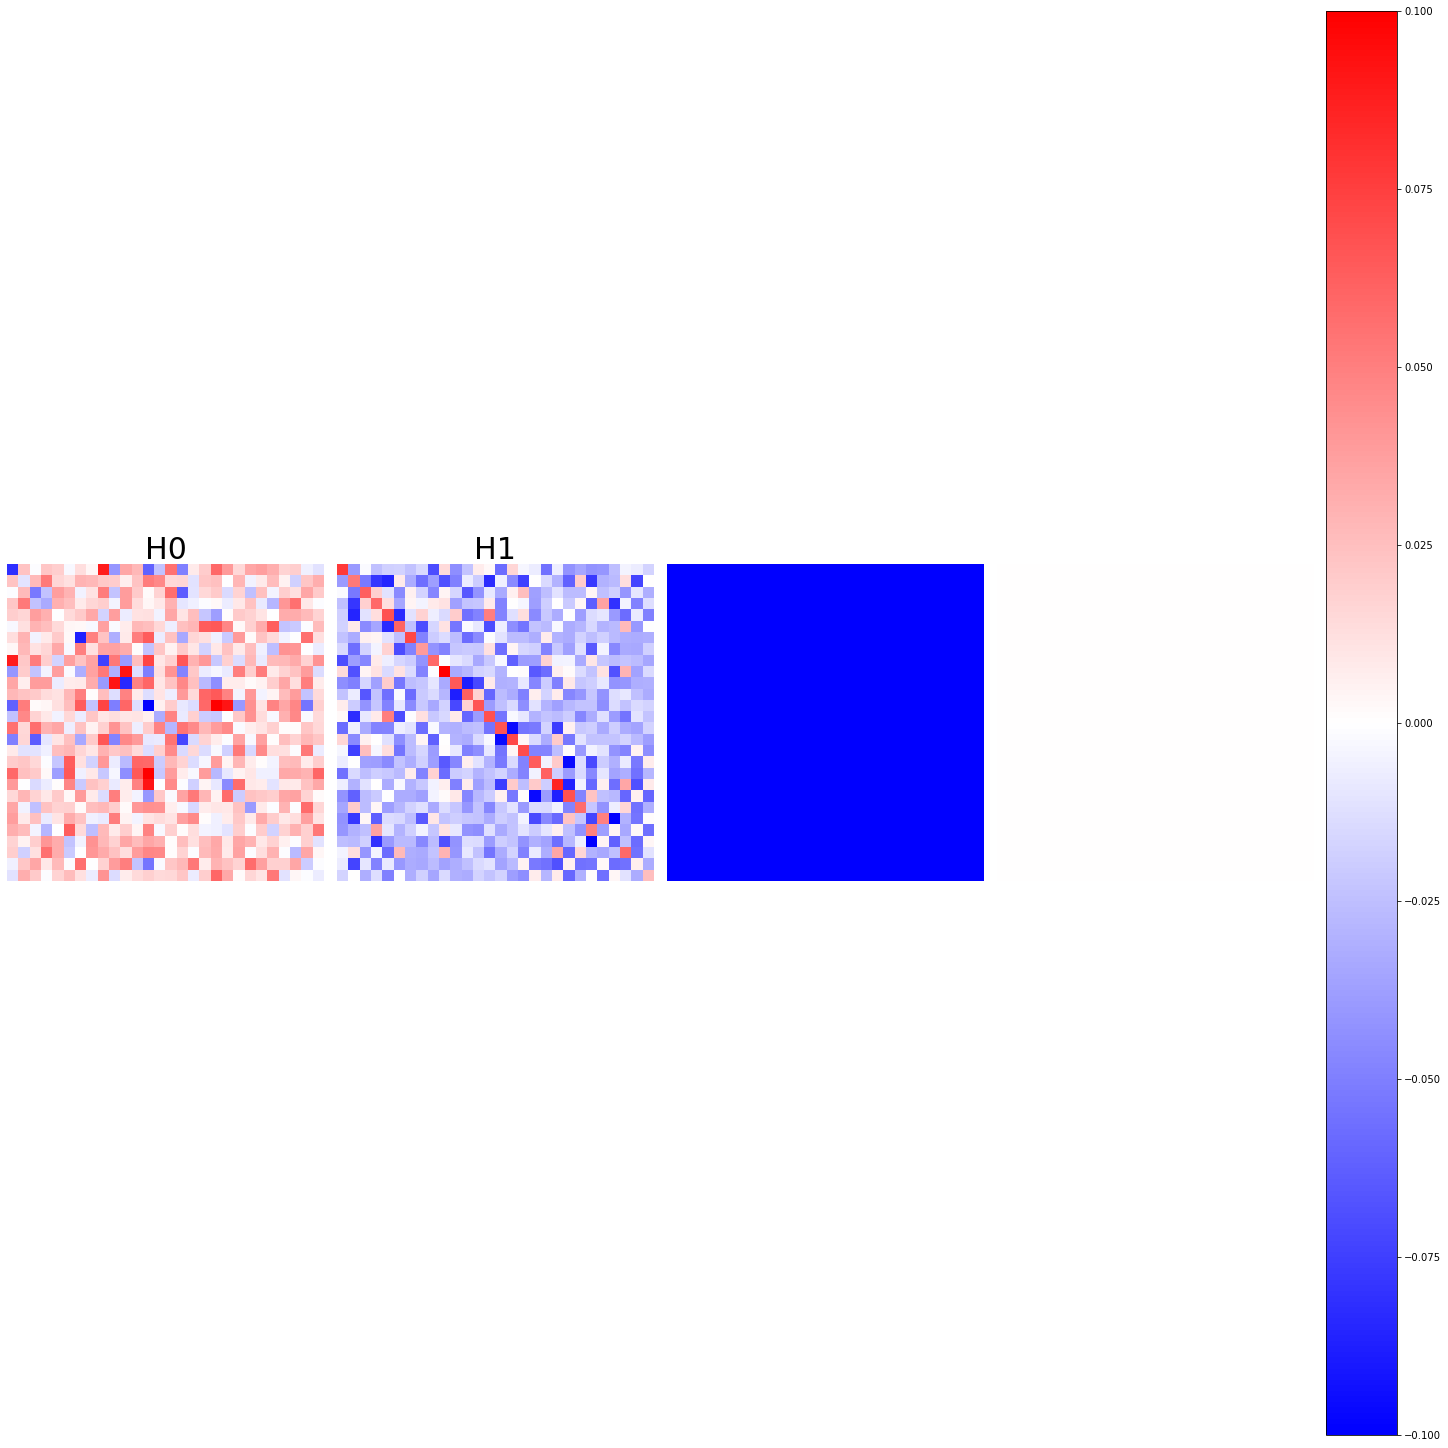

<Figure size 432x288 with 0 Axes>

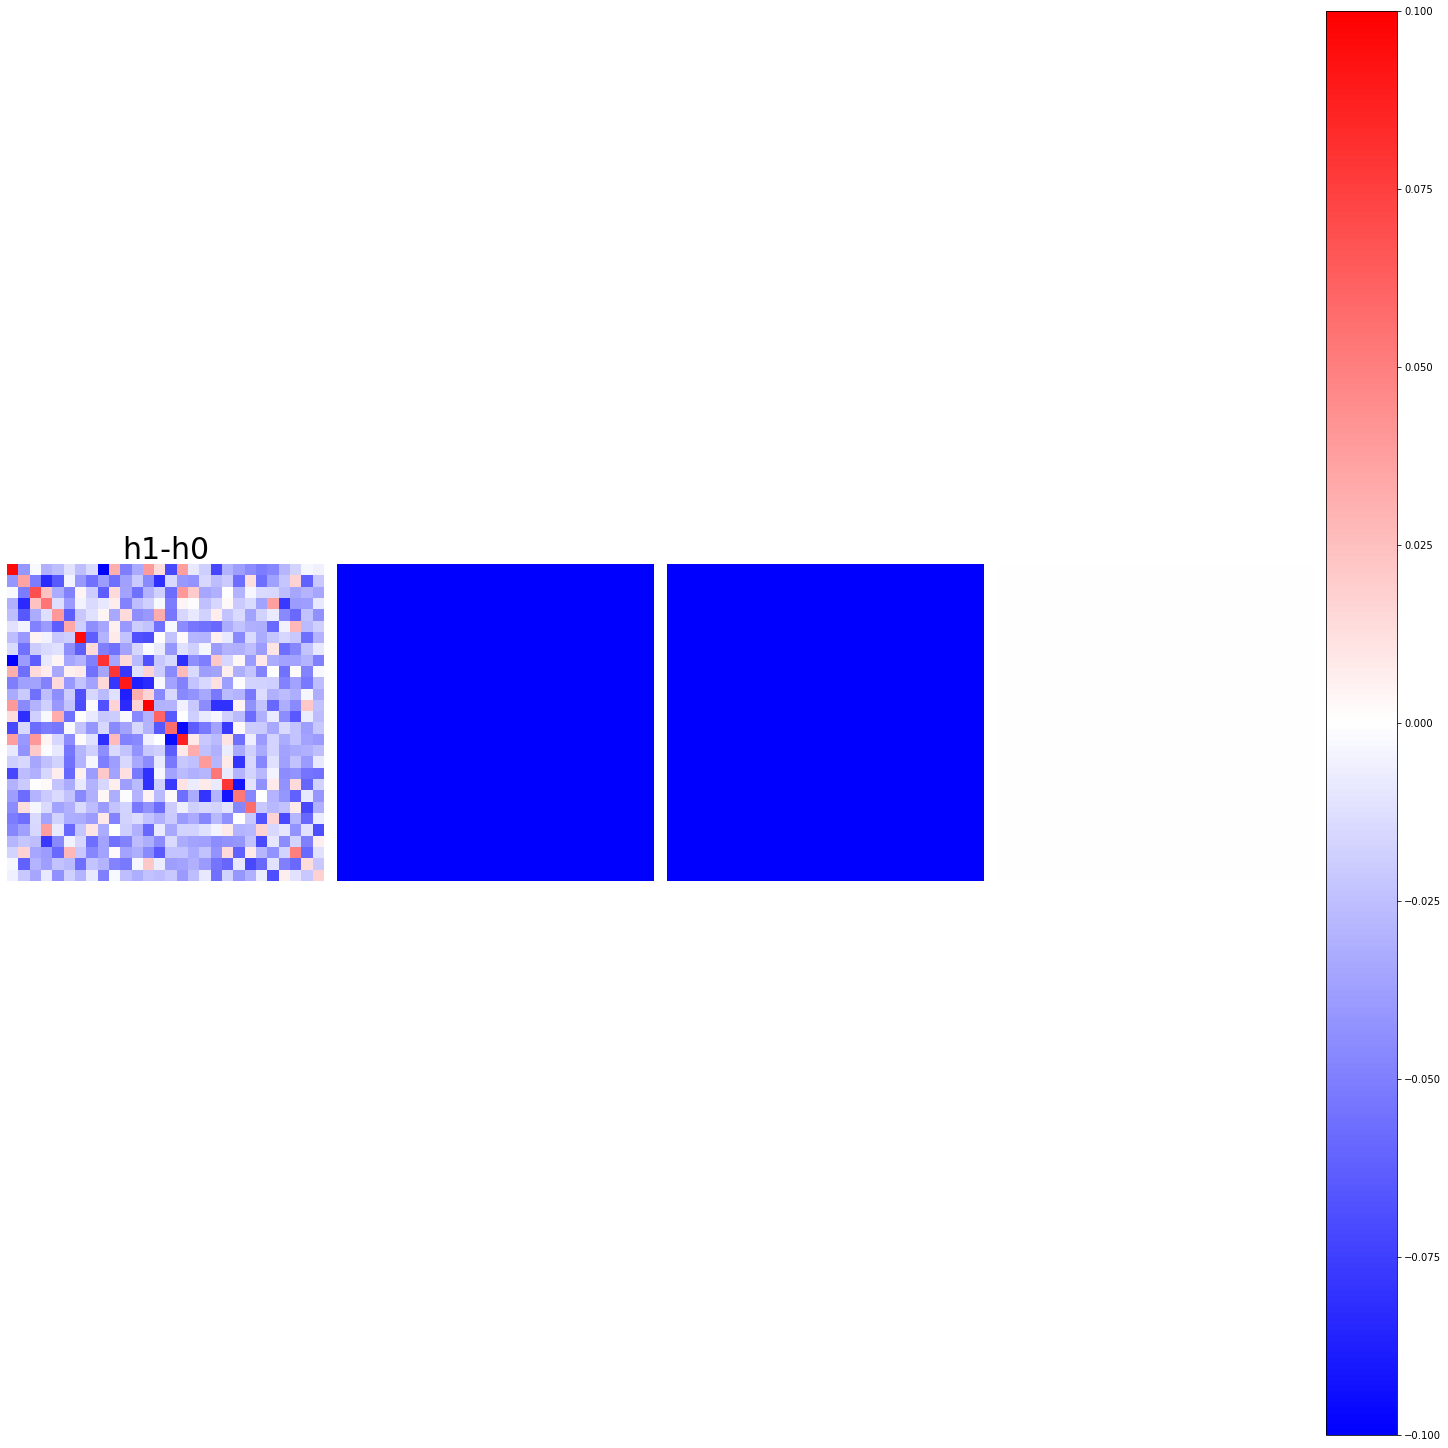

<Figure size 432x288 with 0 Axes>

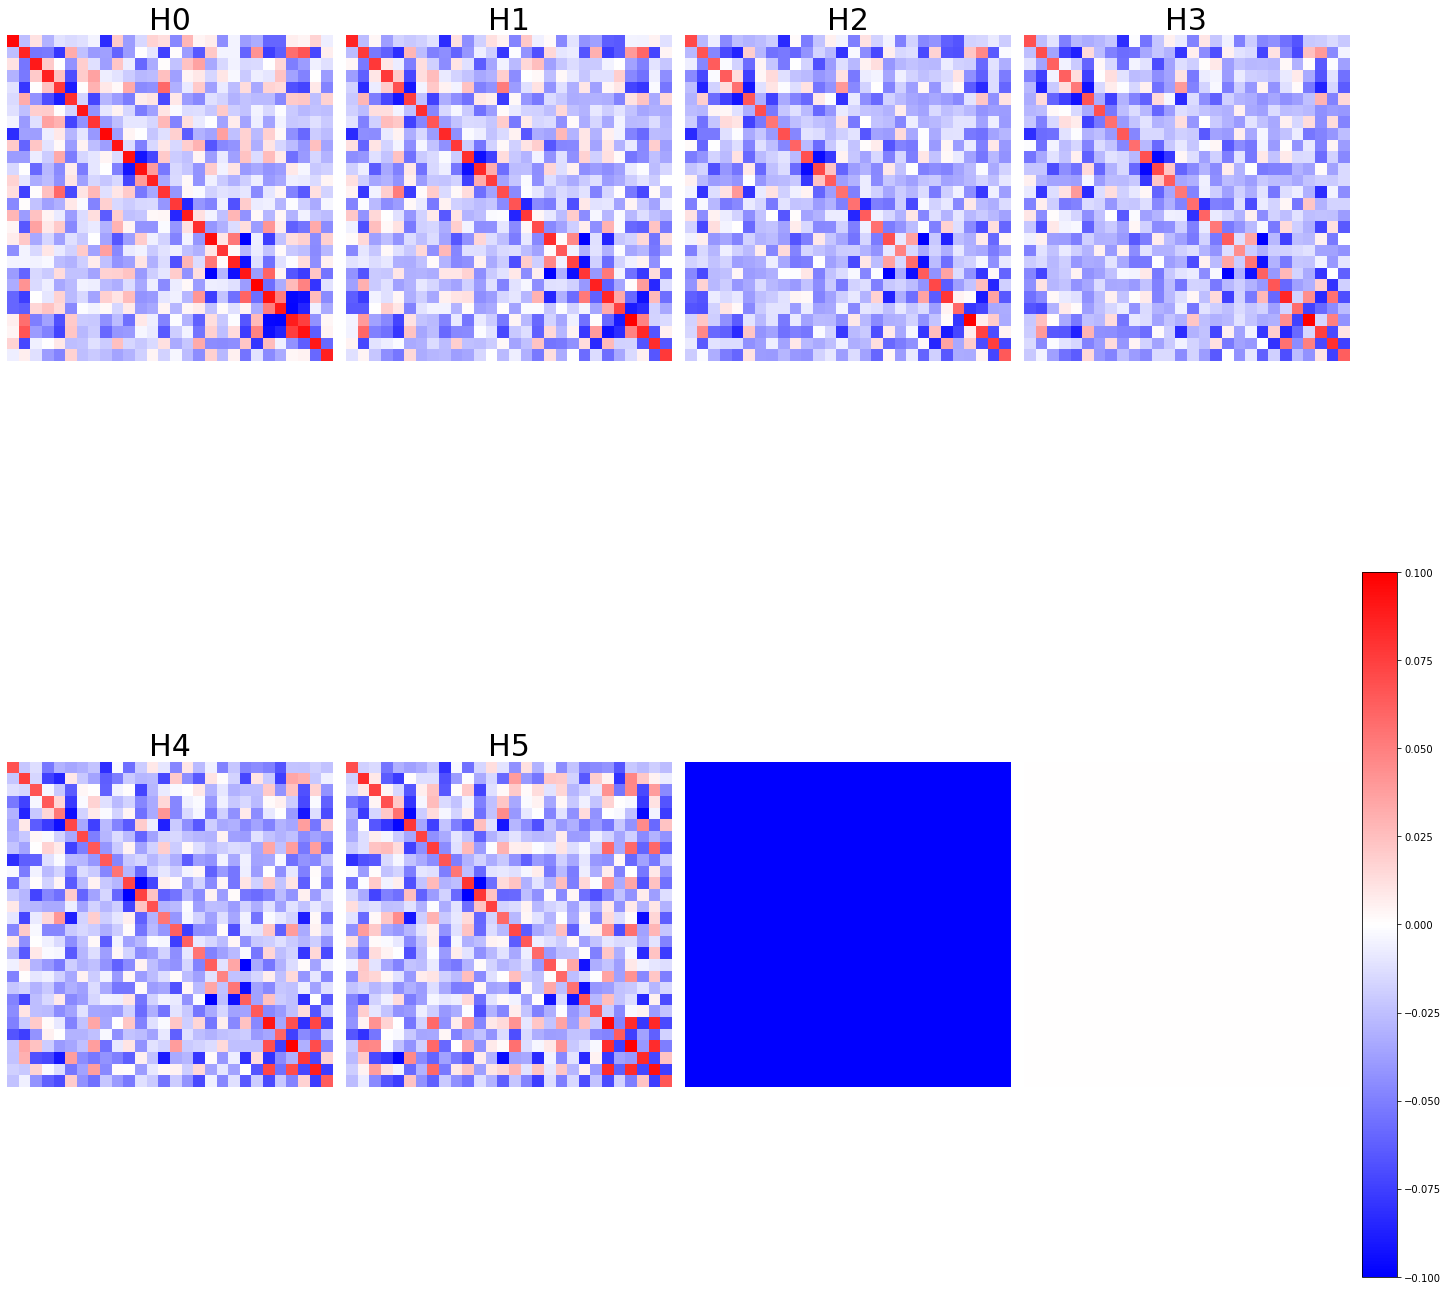

<Figure size 432x288 with 0 Axes>

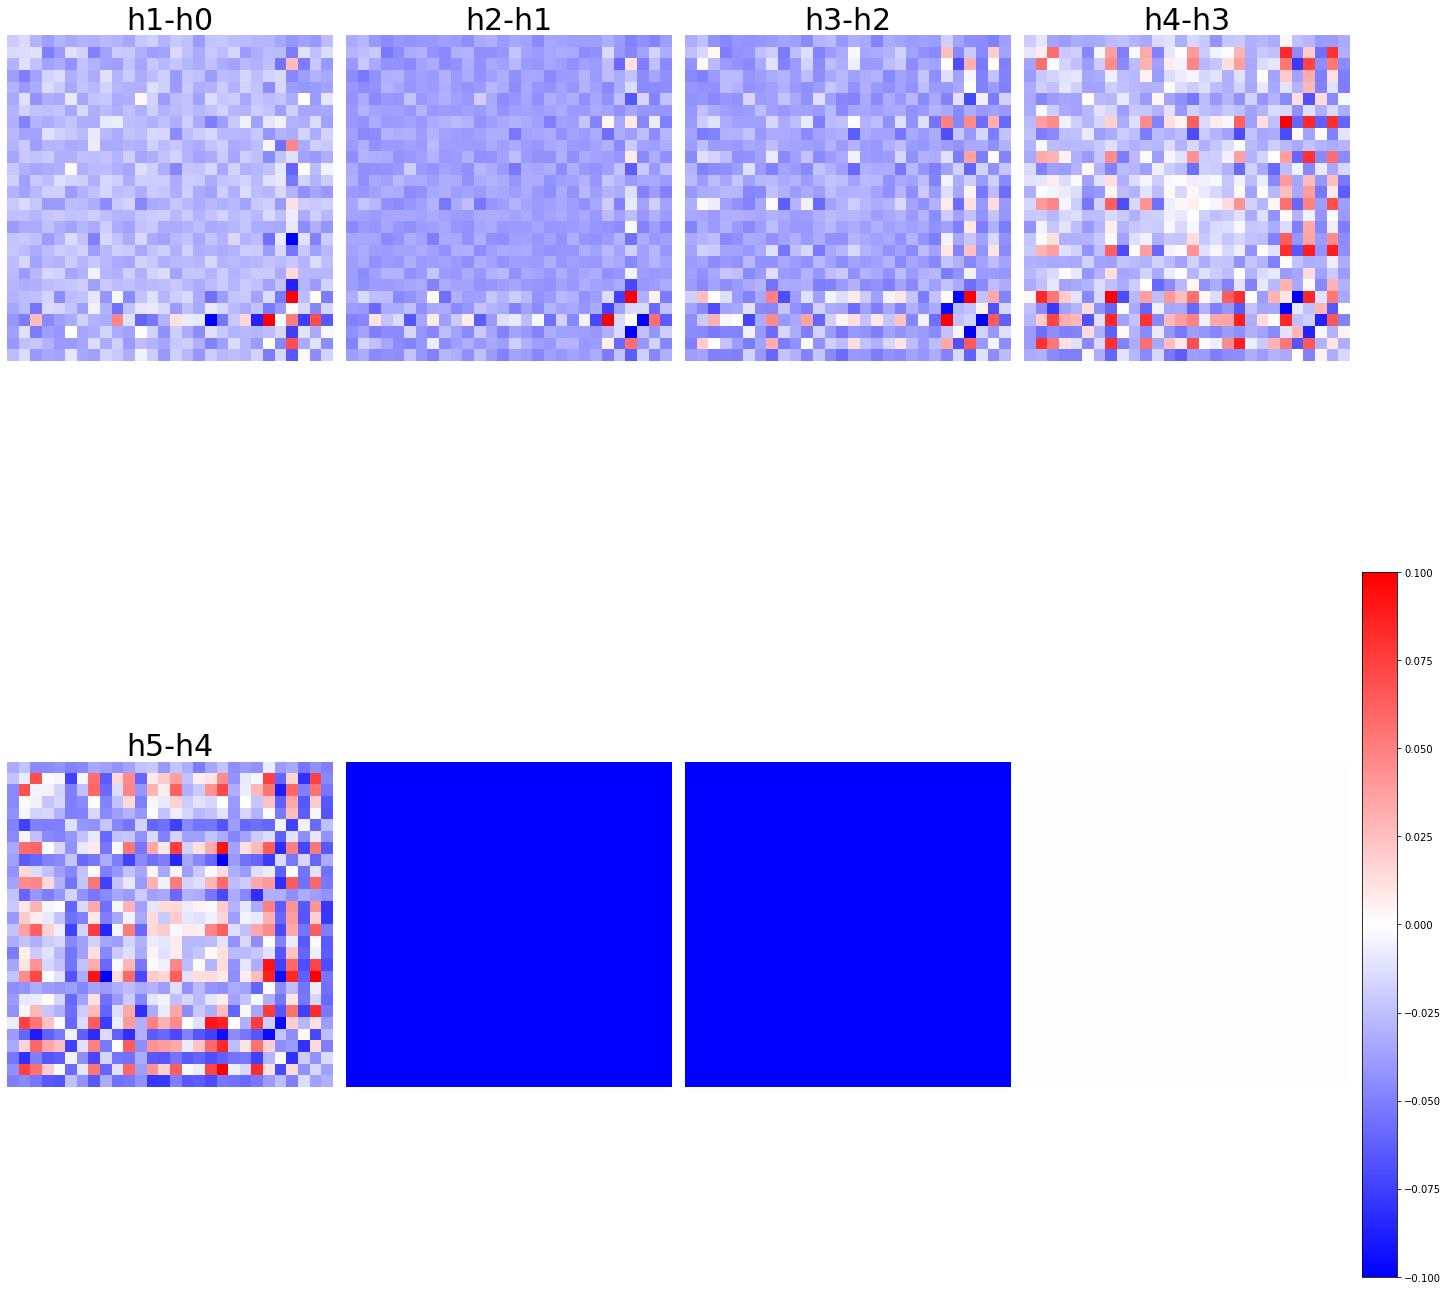

In [27]:
FP.sim_progression(M2, dm, Araw, 'model_2')

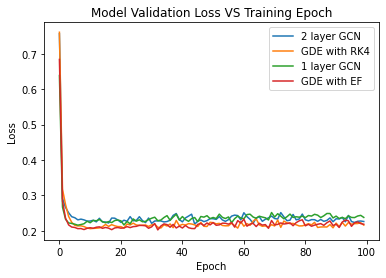

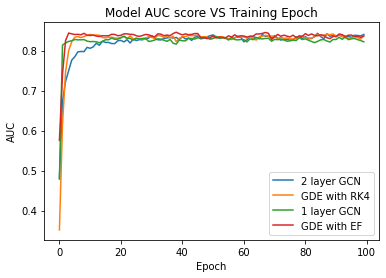

In [28]:
labels = ["2 layer GCN", "GDE with RK4","1 layer GCN", "GDE with EF"]
FP.training_curve_MLP([M1, M2], labels, cap=100)